In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [3]:
# upload mnist


def load_mnist(batch_size=64, is_train=True):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    dataset = datasets.MNIST(
        root='~/data', train=is_train, download=True, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return loader




In [8]:
# get first k images and store in k x 28**2 matrix
def get_k_images(k, loader):
    images = []
    labels = []
    for i, (image, label) in enumerate(loader):
        if i == k:
            break
        images.append(image.view(-1, 28**2))
        labels.append(label)

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    return images, labels


In [9]:
images, labels = get_k_images(100, load_mnist())

In [10]:
images.shape, labels.shape

(torch.Size([6400, 784]), torch.Size([6400]))

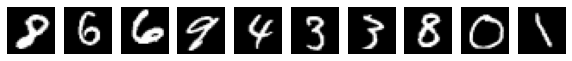

In [12]:
# print first 10 images
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i].view(28, 28), cmap='gray')
    plt.axis('off')

In [13]:
def hopfield(Xi, beta, X):
    # Xi: N x n, beta: int, X: b x n
    return torch.softmax(beta * X @ Xi.t(), dim=1) @ Xi

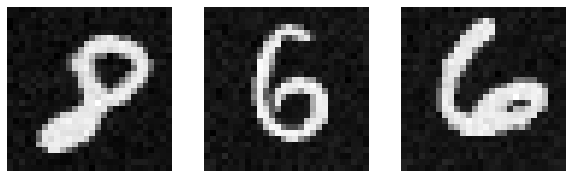

In [18]:
X = images[:3] + torch.randn(3, 28**2) * 0.1
# display X
fig = plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X[i].view(28, 28), cmap='gray')
    plt.axis('off')
    

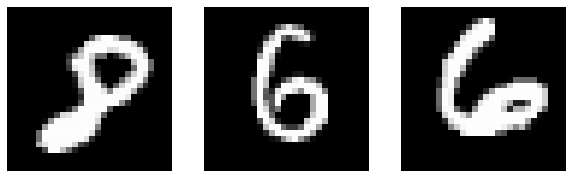

In [19]:
y = hopfield(images, 1, X)
# display y
fig = plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(y[i].view(28, 28), cmap='gray')
    plt.axis('off')